# MATPOWER Interface

See also the API reference for `andes.interop.matpower`.

In [1]:
import andes

from andes.interop.matpower import (start_instance, 
    to_matpower, from_matpower)

## Create an Octave/MATLAB instance

In [2]:
m = start_instance()

## Convert to MATPOWER

In [3]:
ss = andes.system.example()  # load an ieee14 example case

mpc = to_matpower(m, 'mpc', ss)

Test if the power flow of mpc can be solved

In [4]:
m.eval("runpf(mpc)")

'osqp_mex' undefined near line 40 column 13
OSQP Error!

MATPOWER Version 7.1, 08-Oct-2020 -- AC Power Flow (Newton)

Newton's method power flow (power balance, polar) converged in 3 iterations.

Converged in 0.01 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             14     Total Gen Capacity     400.0        -112.0 to 150.0
Generators         5     On-line Capacity       400.0        -112.0 to 150.0
Committed Gens     5     Generation (actual)    226.4              49.8
Loads             11     Load                   223.7              95.4
  Fixed           11       Fixed                223.7              95.4
  Dispatchable     0       Dispatchable          -0.0 of -0.0      -0.0
Shunts             2     Shunt (inj)             -0.0              35.3
Branches          20     Los

In [5]:
mpc_sol = m.pull("mpc")  # retrieve the solution

## Convert from MATPOWER

In [6]:
system = from_matpower(m, 'mpc')

`m.pull()` won't work if one has run OPF in Octave/MATLAB because Oct2Py does not support custom class objects created by MATPOWER. 

`from _matpower()` will read the individual fields to construct an `mpc` dict internally before creating a system.

## Add dynamic data

One can create an Excel file with dynamic data only and use the xlsx parser to load data into system:

In [7]:
from andes.io import xlsx

xlsx.read(system, andes.get_case('ieee14/ieee14_dyn_only.xlsx'))

In [8]:
system.setup()

system.PFlow.run()

system.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Fault 1>: Applying fault on Bus (idx=7) at t=1.0 sec.
<Fault 1>: Clearing fault on Bus (idx=7) at t=1.03333 sec.


True

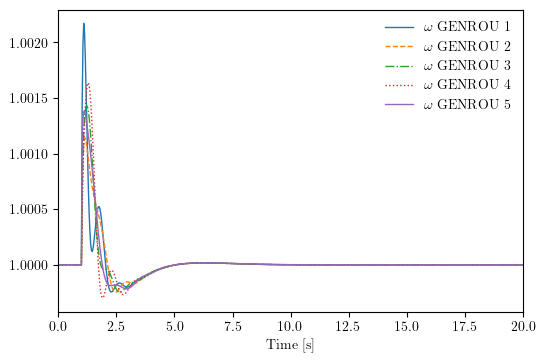

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [9]:
system.TDS.plt.plot(system.GENROU.omega)

Since the data in `ieee14_dyn_only.xlsx` is stripped from `ieee14/ieee14_fault.xlsx`, the above results is identical to the simulation of the latter case:

In [10]:
ss = andes.run(andes.get_case("ieee14/ieee14_fault.xlsx"), 
               routine='tds', verbose=30)

  0%|          | 0/100 [00:00<?, ?%/s]

<Fault 1>: Applying fault on Bus (idx=9) at t=1.0 sec.
<Fault 1>: Clearing fault on Bus (idx=9) at t=1.1 sec.
-> Single process finished in 0.6562 seconds.


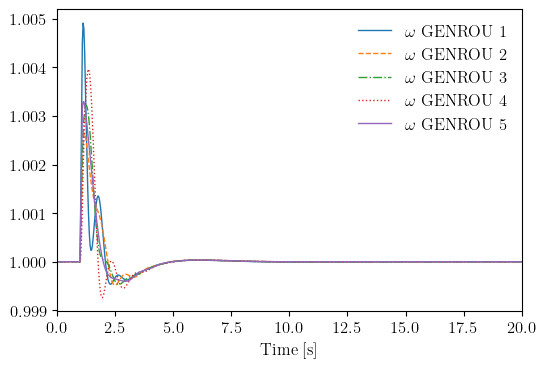

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [11]:
ss.TDS.plt.plot(ss.GENROU.omega)